In [1]:
import pandas as pd
import os
import re
import csv
import numpy as np

In [2]:
def clean(line):
    # line = line.strip().replace("newline_char", "||||||||||||||||||||||||||||")
    # line = line.strip().replace("newline_char", " ")
    line = line.strip()
    line = line.replace("( opens in new window )", "")
    line = line.replace("click to email this to a friend", "")
    line = line.replace("lick to share on whatsapp", "")
    line = line.replace("click to share on facebook", "")
    line = line.replace("share on facebook", "")
    line = line.replace("click to share on twitter", "")
    line = line.replace("click to share on pinterest", "")
    line = line.replace("click to share on tumblr", "")
    line = line.replace("click to share on google+", "")
    line = line.replace("feel free to share these resources in your social "
                        "media networks , websites and other platforms", "")
    line = line.replace("share share tweet link", "")
    line = line.replace("e-mail article print share", "")
    line = line.replace("read or share this story :", "")
    line = line.replace("share the map view in e-mail by clicking the share "
                        "button and copying the link url .     embed the map "
                        "on your website or blog by getting a snippet of html "
                        "code from the share button .     if you wish to "
                        "provide feedback or comments on the map , or if "
                        "you are aware of map layers or other "
                        "datasets that you would like to see included on our maps , "
                        "please submit them for our evaluation using this this form .", "")
    line = line.replace("share this article share tweet post email", "")
    line = line.replace("skip in skip x embed x share close", "")
    line = line.replace("share tweet pin email", "")
    line = line.replace("share on twitter", "")
    line = line.replace("feel free to weigh-in yourself , via"
                        "the comments section . and while you ’ "
                        "re here , why don ’ t you sign up to "
                        "follow us on twitter us on twitter .", "")
    line = line.replace("follow us on facebook , twitter , instagram and youtube", "")
    line = line.replace("follow us on twitter", "")
    line = line.replace("follow us on facebook", "")
    line = line.replace("play facebook twitter google plus embed", "")
    line = line.replace("play facebook twitter embed", "")
    line = line.replace("enlarge icon pinterest icon close icon", "")
    line = line.replace("follow on twitter", "")
    line = line.replace("autoplay autoplay copy this code to your website or blog", "")
    return line

In [3]:
def clean_str(s):
    s = s.lower()
    s = s.strip()
    s = s.replace('<unk>','')
    s = s.replace('`', '')
    # s = s.replace('.', '\n')
    s = s.replace(',', '')
    s = s.replace(';', '')
    s = s.replace('\'', '')
    s = s.replace('\"', '')
    s = s.replace('(', '')
    s = s.replace(')', '')
    s = s.replace('-', ' ')
    s = s.replace('<p>', '')
    s = s.replace('</p>', '')
    s = s.replace('<t>', '')
    s = s.replace('</t>', '')
    s = s.replace('[!@#$]', '')
    s = s.replace('– ', '')
    s = s.replace('  ', ' ')
    return s

In [4]:
# download train.src
!gdown 1ScGIcY_TcaIY57q9xdCQmi2EVAbmjHed 

Downloading...
From: https://drive.google.com/uc?id=1ScGIcY_TcaIY57q9xdCQmi2EVAbmjHed
To: /content/train.src
100% 550M/550M [00:05<00:00, 105MB/s]


In [5]:
# download train.tgt
!gdown 1iP2yUNI4-wkJvCMl-RsKBK9rJkEfnZdM

Downloading...
From: https://drive.google.com/uc?id=1iP2yUNI4-wkJvCMl-RsKBK9rJkEfnZdM
To: /content/train.tgt
100% 58.8M/58.8M [00:00<00:00, 75.2MB/s]


In [6]:
# download test.src
!gdown 1_eixB51Mrgyttq-Ke4hI5czcggTBhvXf

Downloading...
From: https://drive.google.com/uc?id=1_eixB51Mrgyttq-Ke4hI5czcggTBhvXf
To: /content/test.src
100% 69.4M/69.4M [00:00<00:00, 76.8MB/s]


In [7]:
# download test.tgt
!gdown 1Y56DFe5FROz9ikkYtEEAGcPBevV1IZa6

Downloading...
From: https://drive.google.com/uc?id=1Y56DFe5FROz9ikkYtEEAGcPBevV1IZa6
To: /content/test.tgt
100% 7.31M/7.31M [00:00<00:00, 155MB/s]


In [8]:
# list of dictionary
# each topic is dict that has following keys: 
# 'articles': list[str]
# 'paragraphs': list[list[str]] // each article is parsed into paragraphs
# 'summary': str
topics = []
src = 'test'

In [9]:
#get article
with open('./' + src + '.src') as file:
    raw = file.read()
    raw = clean(raw)
    
    topics = [{'articles': list(filter(str.strip, clean_str(articles).split('|||||')))} for articles in raw.split('\n')] # topics = [topic1, topic2, topic3, ...]
    
    print('total topics: ', len(topics)) #train / val - 5622 topics
    print('first topic has acticles: ', len(topics[0]["articles"]))
    
    for topic in topics:
        topic['paragraphs'] = [list(filter(str.strip, article.split("newline_char"))) for article in topic["articles"]]
        topic['articles'] = [article.replace("newline_char", '. ') for article in topic['articles']]
    file.close()

total topics:  5622
first topic has acticles:  2


In [10]:
#get summary
with open('./' + src + '.tgt') as file:
    raw = file.read()
    raw = clean_str(raw)
    
    summaries = raw.split('\n')
    
    for topic, summary in zip(topics, summaries):
        topic['summary'] = summary
    
    file.close()

In [ ]:
import pprint as pp
pp.pprint(topics[0])

{'articles': ['gop eyes gains as voters in 11 states pick governors .  .  '
              'enlarge this image toggle caption jim cole/ap jim cole/ap .  .  '
              'voters in 11 states will pick their governors tonight and '
              'republicans appear on track to increase their numbers by at '
              'least one with the potential to extend their hold to more than '
              'two thirds of the nations top state offices. .  .  eight of the '
              'gubernatorial seats up for grabs are now held by democrats '
              'three are in republican hands. republicans currently hold 29 '
              'governorships democrats have 20 and rhode islands gov. lincoln '
              'chafee is an independent. .  .  polls and race analysts suggest '
              'that only three of tonights contests are considered competitive '
              'all in states where incumbent democratic governors arent '
              'running again: montana new hampshire and wash

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
!pip install datasets
!pip install rouge_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 441 kB 4.9 MB/s 
     |████████████████████████████████| 212 kB 67.3 MB/s 
     |████████████████████████████████| 163 kB 72.4 MB/s 
     |████████████████████████████████| 115 kB 66.6 MB/s 
     |████████████████████████████████| 127 kB 76.2 MB/s 
     |████████████████████████████████| 115 kB 79.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24955 sha256=3e50ceab047cd1753635cf6888ade05102390a9b0921ca8095fc5c98376aa1dd
  Stored in directory: /root/.cache/pip/wheels/84/ac/6b/38096e3c5bf1dc87911e3585875e21a3ac610348e740409c76
Successfully built rouge-scor

In [13]:
from datasets import load_metric
metric = load_metric("rouge")

def calc_rouge_scores(candidates, references):
    result = metric.compute(predictions=candidates, references=references, use_stemmer=True)
    result = {key: round(value.mid.fmeasure * 100, 1) for key, value in result.items()}
    return result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  


In [14]:
'''
Summarizes corpus with TextRank.
:parameter    
    :param corpus: str or list - dtf["text"]    
    :param ratio: length of the summary (ex. 20% of the text)
:return    
    list of summaries
'''
import gensim

def textrank(corpus, ratio=0.2):    
    if type(corpus) is str:        
       corpus = [corpus]    
    lst_summaries = [gensim.summarization.summarize(txt,  
                     ratio=ratio) for txt in corpus]    
    return lst_summaries

In [ ]:
testnum = 5000

In [ ]:
#baseline model - textRank
articles = []
references = []
for i, topic in enumerate(topics):
  summary = topic['summary']
  article = topic['articles'][0]
  paragraphs = topic['paragraphs'][0]

  if len(summary) < (0.75*len(article)) and len(nltk.sent_tokenize(article))>10:
    articles.append(article)
    references.append(summary)

  # if len(summary) < (0.75*len(article)) and len(paragraphs) > 5 and len(article.split('.'))>10:
    


# articles = [topic['articles'][0] for topic in topics[:10]]
# print(len(articles))
candidates = textrank(articles)
print(len(candidates))

#{'rouge1': 36.5, 'rouge2': 10.4, 'rougeL': 17.9, 'rougeLsum': 23.1}

print(calc_rouge_scores(candidates, references))

3773
{'rouge1': 37.2, 'rouge2': 10.6, 'rougeL': 18.1, 'rougeLsum': 23.6}


In [ ]:
# drop last paragraph
# each topic is dict that has following keys: 
# 'articles': list[str]
# 'paragraphs': list[list[str]] // each article is parsed into paragraphs
# 'summary': str

articles = []
references = []
for i, topic in enumerate(topics):
  paragraphs = topic['paragraphs'][0]
  if(len(paragraphs)<2):
    continue

  summary = topic['summary']
  article = '. '.join(paragraphs[:-1])
  
  if len(summary) < (0.75*len(article)) and len(nltk.sent_tokenize(article))>10:
    articles.append(article)
    references.append(summary)


# articles = [topic['articles'][0] for topic in topics[:10]]
# print(len(articles))
candidates = textrank(articles)
print(len(candidates))

print(calc_rouge_scores(candidates, references))

{'rouge1': 37.4, 'rouge2': 10.3, 'rougeL': 17.7, 'rougeLsum': 23.7}


In [ ]:
# drop last two paragraphs
# each topic is dict that has following keys: 
# 'articles': list[str]
# 'paragraphs': list[list[str]] // each article is parsed into paragraphs
# 'summary': str

articles = []
references = []
for i, topic in enumerate(topics):
  paragraphs = topic['paragraphs'][0]
  if(len(paragraphs)<3):
    continue

  summary = topic['summary']
  article = '. '.join(paragraphs[:-2])
  
  if len(summary) < (0.75*len(article)) and len(nltk.sent_tokenize(article))>10:
    articles.append(article)
    references.append(summary)


# articles = [topic['articles'][0] for topic in topics[:10]]
# print(len(articles))
candidates = textrank(articles)
print(len(candidates))

print(calc_rouge_scores(candidates, references))

{'rouge1': 37.3, 'rouge2': 10.2, 'rougeL': 17.7, 'rougeLsum': 23.7}


In [ ]:
# drop last 1/n paragraphs

# each topic is dict that has following keys: 
# 'articles': list[str]
# 'paragraphs': list[list[str]] // each article is parsed into paragraphs
# 'summary': str
n = 5
articles = []
references = []
for i, topic in enumerate(topics[:testnum]):
  paragraphs = topic['paragraphs'][0]
  if(len(paragraphs)<3):
    continue

  summary = topic['summary']

  drop = round(len(paragraphs)/n)
  article = '. '.join(paragraphs[:-drop])
  
  if len(summary) < (0.75*len(article)) and len(nltk.sent_tokenize(article))>10:
    articles.append(article)
    references.append(summary)


# articles = [topic['articles'][0] for topic in topics[:10]]
# print(len(articles))
candidates = textrank(articles)
print(len(candidates))

print(calc_rouge_scores(candidates, references))

{'rouge1': 36.9, 'rouge2': 10.0, 'rougeL': 17.6, 'rougeLsum': 23.3}


In [ ]:
# drop first paragraph
# each topic is dict that has following keys: 
# 'articles': list[str]
# 'paragraphs': list[list[str]] // each article is parsed into paragraphs
# 'summary': str

articles = []
references = []
for i, topic in enumerate(topics):
  paragraphs = topic['paragraphs'][0]
  if(len(paragraphs)<2):
    continue

  summary = topic['summary']
  article = '. '.join(paragraphs[1:])
  
  if len(summary) < (0.75*len(article)) and len(nltk.sent_tokenize(article))>10:
    articles.append(article)
    references.append(summary)


# articles = [topic['articles'][0] for topic in topics[:10]]
# print(len(articles))
candidates = textrank(articles)
print(len(candidates))

print(calc_rouge_scores(candidates, references))

{'rouge1': 37.0, 'rouge2': 10.0, 'rougeL': 17.5, 'rougeLsum': 23.6}


In [ ]:
# drop first 1/n paragraphs

# each topic is dict that has following keys: 
# 'articles': list[str]
# 'paragraphs': list[list[str]] // each article is parsed into paragraphs
# 'summary': str
n = 5
articles = []
references = []
for i, topic in enumerate(topics[:testnum]):
  paragraphs = topic['paragraphs'][0]
  if(len(paragraphs)<3):
    continue

  summary = topic['summary']

  drop = round(len(paragraphs)/n)
  article = '. '.join(paragraphs[drop:])
  
  if len(summary) < (0.75*len(article)) and len(nltk.sent_tokenize(article))>10:
    articles.append(article)
    references.append(summary)


# articles = [topic['articles'][0] for topic in topics[:10]]
# print(len(articles))
candidates = textrank(articles)
print(len(candidates))

print(calc_rouge_scores(candidates, references))

2166
{'rouge1': 34.7, 'rouge2': 8.2, 'rougeL': 16.1, 'rougeLsum': 22.0}


In [ ]:
# drop last paragraph + replicate first paragraph

# each topic is dict that has following keys: 
# 'articles': list[str]
# 'paragraphs': list[list[str]] // each article is parsed into paragraphs
# 'summary': str

articles = []
references = []
for i, topic in enumerate(topics[:1000]):
  paragraphs = topic['paragraphs'][0]
  if(len(paragraphs)<3):
    continue

  summary = topic['summary']

  article = '. '.join([paragraphs[0]] + paragraphs[:-1])

  
  if len(summary) < (0.75*len(article)) and len(nltk.sent_tokenize(article))>10:
    articles.append(article)
    references.append(summary)


# articles = [topic['articles'][0] for topic in topics[:10]]
# print(len(articles))
candidates = textrank(articles)
print(len(candidates))

print(calc_rouge_scores(candidates, references))

502
{'rouge1': 37.0, 'rouge2': 10.3, 'rougeL': 18.0, 'rougeLsum': 22.9}


In [39]:
# drop last 1/n paragraphs

# each topic is dict that has following keys: 
# 'articles': list[str]
# 'paragraphs': list[list[str]] // each article is parsed into paragraphs
# 'summary': str
def drop_textrank(n):
  # n = 5
  print(n)
  articles = []
  references = []
  for i, topic in enumerate(topics):
    paragraphs = topic['paragraphs'][0]
    if(len(paragraphs)<3):
      continue

    summary = topic['summary']

    drop = round(len(paragraphs)/n)
    article = '. '.join(paragraphs[:-drop])
    
    if len(summary) < (0.75*len(article)) and len(nltk.sent_tokenize(article))>10:
      articles.append(article)
      references.append(summary)


  # articles = [topic['articles'][0] for topic in topics[:10]]
  # print(len(articles))
  candidates = textrank(articles)
  print(len(candidates))
  scores = calc_rouge_scores(candidates, references)
  print(scores)
  return candidates, scores

In [ ]:
import matplotlib.pyplot as plt

ns = np.array([10, 9, 8, 7])

for n in ns:
  candidates, rough_scores = drop_textrank(n)

roughs = rough_scores['rough1']
print(roughs)

xs = list(np.round(1/ns*100))
print(xs)

plt.plot(xs, roughs)
plt.show()

10
2618
{'rouge1': 37.4, 'rouge2': 10.2, 'rougeL': 17.7, 'rougeLsum': 23.7}
9
2606
{'rouge1': 37.3, 'rouge2': 10.2, 'rougeL': 17.7, 'rougeLsum': 23.6}
8
2570
{'rouge1': 37.2, 'rouge2': 10.1, 'rougeL': 17.7, 'rougeLsum': 23.5}
7
2558
{'rouge1': 37.1, 'rouge2': 10.1, 'rougeL': 17.6, 'rougeLsum': 23.4}


In [37]:
candidates, rough_scores = drop_textrank(11)

11
2636
{'rouge1': 37.4, 'rouge2': 10.3, 'rougeL': 17.8, 'rougeLsum': 23.7}


In [41]:
candidates, rough_scores = drop_textrank(20)

20
2452
{'rouge1': 37.9, 'rouge2': 10.5, 'rougeL': 17.9, 'rougeLsum': 24.1}


In [45]:
candidates, rough_scores = drop_textrank(25)

25
2286
{'rouge1': 38.0, 'rouge2': 10.5, 'rougeL': 17.9, 'rougeLsum': 24.2}


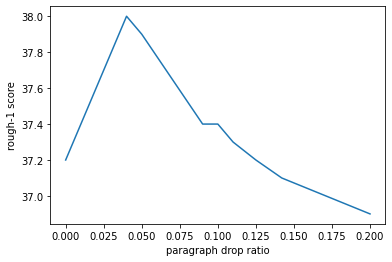

In [47]:
import matplotlib.pyplot as plt

ns = [0, 0.04, 0.05, 0.09, 0.10, 0.11, 0.125, 0.142, 0.2]
roughs = [37.2, 38.0, 37.9, 37.4, 37.4, 37.3, 37.2, 37.1, 36.9]

plt.plot(ns, roughs)
plt.xlabel('paragraph drop ratio')
plt.ylabel('rough-1 score')
plt.show()